In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore') 
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

## Question 1: Tree-based Classifiers and Ensembles 
## Part 1 CM2

In [2]:
df = pd.read_csv('C:\\Users\\mps\\OneDrive - University of Waterloo\\Documents\\657A\\A2\\A2\\Covid\\covid_train.csv',delimiter=',', error_bad_lines=False, warn_bad_lines=True)
df

,Age_Group,Client_Gender,Case_AcquisitionInfo,Reporting_PHU_City,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Outcome1
0,50s,MALE,NO KNOWN EPI LINK,Oakville,NaN,43.413997,-79.744796,Resolved
1,20s,FEMALE,CC,Guelph,NaN,43.524881,-80.233743,Not Resolved
2,90s,FEMALE,OB,Barrie,Yes,44.410713,-79.686306,Resolved
3,20s,FEMALE,MISSING INFORMATION,Toronto,NaN,43.656591,-79.379358,Resolved
4,90s,FEMALE,OB,Ottawa,Yes,45.345665,-75.763912,Fatal
...,...,...,...,...,...,...,...,...
14846,<20,FEMALE,CC,Hamilton,NaN,43.257631,-79.871341,Not Resolved
14847,20s,FEMALE,NO KNOWN EPI LINK,Mississauga,NaN,43.647471,-79.708893,Not Resolved
14848,80s,MALE,OB,Thorold,Yes,43.116537,-79.241220,Fatal
14849,50s,FEMALE,CC,Newmarket,NaN,44.048023,-79.480239,Fatal


In [3]:
df.dtypes

Age_Group                   object
Client_Gender               object
Case_AcquisitionInfo        object
Reporting_PHU_City          object
Outbreak_Related            object
Reporting_PHU_Latitude     float64
Reporting_PHU_Longitude    float64
Outcome1                    object
dtype: object

In [4]:
df.nunique()

Age_Group                   9
Client_Gender               4
Case_AcquisitionInfo        6
Reporting_PHU_City         34
Outbreak_Related            1
Reporting_PHU_Latitude     34
Reporting_PHU_Longitude    34
Outcome1                    3
dtype: int64

In [5]:
df['Client_Gender'].value_counts()

FEMALE            7499
MALE              7243
UNSPECIFIED        107
GENDER DIVERSE       2
Name: Client_Gender, dtype: int64

In [6]:
df.isnull().sum()

Age_Group                     6
Client_Gender                 0
Case_AcquisitionInfo          0
Reporting_PHU_City            0
Outbreak_Related           9020
Reporting_PHU_Latitude        0
Reporting_PHU_Longitude       0
Outcome1                      0
dtype: int64

We see there are missing values in the columns "Age_Group" and "Outbreak_Related".

As confirmed from the instructors, we are replacing those missing values in the colum "Outbreak_Related" with "No".

In [3]:
df['Outbreak_Related'].replace(np.nan, 'No',inplace=True)
df

,Age_Group,Client_Gender,Case_AcquisitionInfo,Reporting_PHU_City,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Outcome1
0,50s,MALE,NO KNOWN EPI LINK,Oakville,No,43.413997,-79.744796,Resolved
1,20s,FEMALE,CC,Guelph,No,43.524881,-80.233743,Not Resolved
2,90s,FEMALE,OB,Barrie,Yes,44.410713,-79.686306,Resolved
3,20s,FEMALE,MISSING INFORMATION,Toronto,No,43.656591,-79.379358,Resolved
4,90s,FEMALE,OB,Ottawa,Yes,45.345665,-75.763912,Fatal
...,...,...,...,...,...,...,...,...
14846,<20,FEMALE,CC,Hamilton,No,43.257631,-79.871341,Not Resolved
14847,20s,FEMALE,NO KNOWN EPI LINK,Mississauga,No,43.647471,-79.708893,Not Resolved
14848,80s,MALE,OB,Thorold,Yes,43.116537,-79.241220,Fatal
14849,50s,FEMALE,CC,Newmarket,No,44.048023,-79.480239,Fatal


In [4]:
df[df['Age_Group'].isnull()]

,Age_Group,Client_Gender,Case_AcquisitionInfo,Reporting_PHU_City,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Outcome1
1231,NaN,FEMALE,OB,Sudbury,No,46.466092,-80.998059,Not Resolved
3475,NaN,FEMALE,OB,Windsor,Yes,42.308796,-83.033670,Not Resolved
11384,NaN,UNSPECIFIED,NO KNOWN EPI LINK,Simcoe,No,42.847825,-80.303815,Not Resolved
11666,NaN,FEMALE,CC,Newmarket,No,44.048023,-79.480239,Resolved
12197,NaN,UNSPECIFIED,NO KNOWN EPI LINK,Windsor,No,42.308796,-83.033670,Fatal
12884,NaN,UNSPECIFIED,NO KNOWN EPI LINK,Windsor,No,42.308796,-83.033670,Resolved


Above are rows in the data where column "Age_Group" is missing. We are replacing the missing value with the mode of the same column corresponding to a particular "Client_Gender".

In [9]:
df[['Client_Gender','Age_Group']].value_counts()

Client_Gender   Age_Group
FEMALE          90s          1209
                80s          1178
MALE            20s          1075
                80s          1013
FEMALE          20s           984
MALE            60s           834
                50s           832
                30s           819
                70s           795
FEMALE          50s           793
                30s           777
                40s           742
MALE            40s           679
FEMALE          70s           633
MALE            <20           602
                90s           594
FEMALE          60s           590
                <20           590
UNSPECIFIED     80s            21
                20s            16
                90s            15
                30s            13
                <20            10
                60s             8
                40s             8
                50s             7
                70s             6
GENDER DIVERSE  30s             1
                <20   

In [5]:
df_female = df[df.Client_Gender=='FEMALE']
df_female['Age_Group'].fillna('90s',inplace = True)
df_unsp = df[df.Client_Gender=='UNSPECIFIED']
df_unsp['Age_Group'].fillna('80s',inplace = True)
df_gd = df[df.Client_Gender=='GENDER DIVERSE']
df_male = df[df.Client_Gender=='MALE']
df_final = df_male.append([df_gd,df_unsp,df_female])
df_final.shape

(14851, 8)

Formatting the values of "Age_Group" as appropriate.

In [6]:
df_final["Age_Group"].replace({"90s": 90, "80s": 80,"70s": 70, "60s": 60,"50s": 50, "40s": 40,"30s": 30, "20s": 20, "<20": 19 }, inplace=True)
df_final

,Age_Group,Client_Gender,Case_AcquisitionInfo,Reporting_PHU_City,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Outcome1
0,50,MALE,NO KNOWN EPI LINK,Oakville,No,43.413997,-79.744796,Resolved
5,60,MALE,OB,Newmarket,Yes,44.048023,-79.480239,Fatal
6,70,MALE,NO KNOWN EPI LINK,Thorold,No,43.116537,-79.241220,Fatal
7,50,MALE,MISSING INFORMATION,Toronto,No,43.656591,-79.379358,Not Resolved
10,30,MALE,NO KNOWN EPI LINK,Ottawa,No,45.345665,-75.763912,Resolved
...,...,...,...,...,...,...,...,...
14845,80,FEMALE,OB,Toronto,Yes,43.656591,-79.379358,Fatal
14846,19,FEMALE,CC,Hamilton,No,43.257631,-79.871341,Not Resolved
14847,20,FEMALE,NO KNOWN EPI LINK,Mississauga,No,43.647471,-79.708893,Not Resolved
14849,50,FEMALE,CC,Newmarket,No,44.048023,-79.480239,Fatal


In [12]:
round(df_final.corr(method='pearson'),2)

,Age_Group,Reporting_PHU_Latitude,Reporting_PHU_Longitude
Age_Group,1.00,-0.03,0.03
Reporting_PHU_Latitude,-0.03,1.00,0.28
Reporting_PHU_Longitude,0.03,0.28,1.00


From the above table, we see that the coulmns "Age Group", "Reporting_PHU_Latitude" and "Reporting_PHU_Longitude" have weak linear relationship between each other.

## 1. Analysis with feature selection

Since columns "Reporting_PHU_Latitude" & "Reporting_PHU_Longitude" gives us the same information as of column "Reporting_PHU_City" we are dropping the column for the analysis

We are performing one hot encoding on the categorical columns 'Client_Gender', 'Case_AcquisitionInfo', 'Outbreak_Related'

In [8]:
df_final_feature = df_final.drop(['Reporting_PHU_City'], axis=1)
dataset_feature = pd.get_dummies(df_final_feature, columns = ['Client_Gender', 'Case_AcquisitionInfo', 'Outbreak_Related'])
dataset_feature

,Age_Group,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Outcome1,Client_Gender_FEMALE,Client_Gender_GENDER DIVERSE,Client_Gender_MALE,Client_Gender_UNSPECIFIED,Case_AcquisitionInfo_CC,Case_AcquisitionInfo_MISSING INFORMATION,Case_AcquisitionInfo_NO KNOWN EPI LINK,Case_AcquisitionInfo_OB,Case_AcquisitionInfo_TRAVEL,Case_AcquisitionInfo_UNSPECIFIED EPI LINK,Outbreak_Related_No,Outbreak_Related_Yes
0,50,43.413997,-79.744796,Resolved,0,0,1,0,0,0,1,0,0,0,1,0
5,60,44.048023,-79.480239,Fatal,0,0,1,0,0,0,0,1,0,0,0,1
6,70,43.116537,-79.241220,Fatal,0,0,1,0,0,0,1,0,0,0,1,0
7,50,43.656591,-79.379358,Not Resolved,0,0,1,0,0,1,0,0,0,0,1,0
10,30,45.345665,-75.763912,Resolved,0,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,80,43.656591,-79.379358,Fatal,1,0,0,0,0,0,0,1,0,0,0,1
14846,19,43.257631,-79.871341,Not Resolved,1,0,0,0,1,0,0,0,0,0,1,0
14847,20,43.647471,-79.708893,Not Resolved,1,0,0,0,0,0,1,0,0,0,1,0
14849,50,44.048023,-79.480239,Fatal,1,0,0,0,1,0,0,0,0,0,1,0


In [9]:
target=["Outcome1"]
cols_f=[cols_f for cols_f in dataset_feature.columns if cols_f not in target]

x_f=dataset_feature[cols_f]
y_f=dataset_feature[target]

#splitting the dataset into train, test and using train for cross validation
x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(x_f, y_f, test_size = 0.2, random_state = 275)

  Max_depth  Mean Accuracy
0         3         0.6441
1         5         0.6545
2        10         0.6546
3      None         0.6440


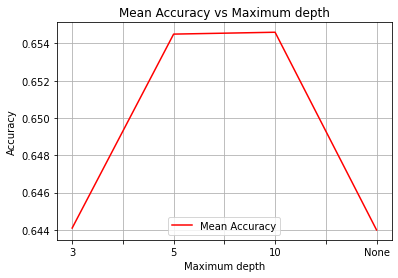

In [42]:
def dt_classifier(depth=None,min_leaf=1):
    DTclassifier = DecisionTreeClassifier(random_state = 0,max_depth=depth,min_samples_leaf=min_leaf)
    scores = cross_val_score(DTclassifier, x_train_f, y_train_f, cv=10)
    acc=round(scores.mean(),4)
    return acc

depth=[]
res=[]
res.append(dt_classifier(depth=3))
depth.append(3)
res.append(dt_classifier(depth=5))
depth.append(5)
res.append(dt_classifier(depth=10))
depth.append(10)
res.append(dt_classifier())
depth.append('None')
a=list(zip(depth,res))
df_dt_acc = pd.DataFrame(a, columns = ['Max_depth', 'Mean Accuracy'])
print(df_dt_acc)

#Plot graph for different maximum depth values and corresponding accuracy scores
df_dt_acc.plot(x='Max_depth', y='Mean Accuracy', color='red');
plt.grid();
plt.title('Mean Accuracy vs Maximum depth');
plt.xlabel('Maximum depth');
plt.ylabel('Accuracy');

    Trees Max_depth  Mean Accuracy
0       5         3         0.6051
1       5         5         0.6472
2       5        10         0.6592
3       5      None         0.6428
4      10         3         0.6095
5      10         5         0.6481
6      10        10         0.6587
7      10      None         0.6442
8      50         3         0.6159
9      50         5         0.6570
10     50        10         0.6601
11     50      None         0.6441
12    150         3         0.6268
13    150         5         0.6636
14    150        10         0.6597
15    150      None         0.6478
16    200         3         0.6258
17    200         5         0.6634
18    200        10         0.6594
19    200      None         0.6453


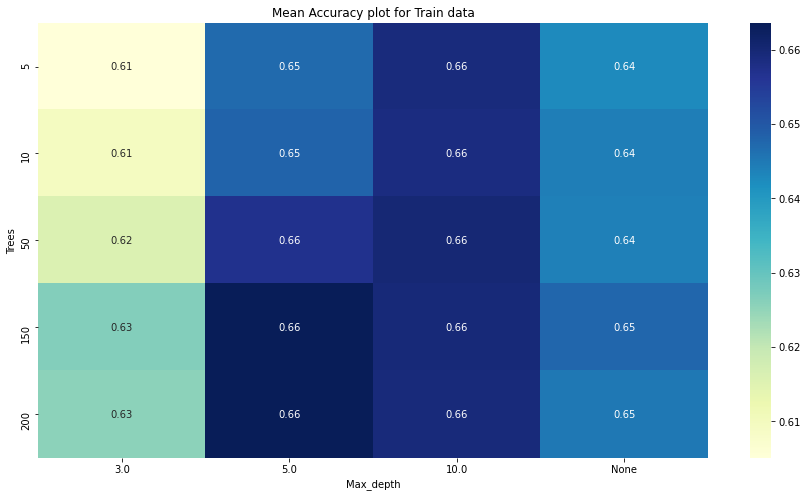

In [43]:
def rf_classifier(estimators,max_depth=None):
    RFclassifier = RandomForestClassifier(n_estimators=estimators,random_state = 0,max_depth=max_depth)
    scores = cross_val_score(RFclassifier, x_train_f, y_train_f.values.ravel(), cv=10)
    acc=round(scores.mean(),4)
    return acc

trees = [5, 10, 50, 150, 200]
depth = [3, 5, 10, None]
tree_depth_acc=[]
for i in trees:
    for j in depth:
        tree_depth_acc.append([i,j,rf_classifier(estimators=i,max_depth=j)])
df_rf_acc = pd.DataFrame(tree_depth_acc, columns = ['Trees', 'Max_depth','Mean Accuracy'])
df_rf_acc.replace(np.nan,'None',inplace=True)
print(df_rf_acc)

df_rf_acc=df_rf_acc.pivot(index='Trees',columns='Max_depth',values='Mean Accuracy')
#Plotting the graph
plt.figure(figsize=(15,8))
sns.heatmap(data=df_rf_acc,annot=True,cmap="YlGnBu")
plt.title("Mean Accuracy plot for Train data")
plt.show()

   Estimators  Mean Accuracy
0           5         0.6549
1          10         0.6575
2          50         0.6598
3         150         0.6600
4         200         0.6613


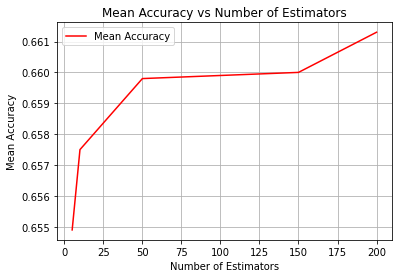

In [44]:
def gb_classifier(estimators):
    gbclassifier = GradientBoostingClassifier(n_estimators=estimators,random_state = 0)
    scores = cross_val_score(gbclassifier, x_train_f, y_train_f.values.ravel(), cv=10)
    acc=round(scores.mean(),4)
    return acc

bstages = [5, 10, 50, 150, 200]
bstages_acc=[]
for i in bstages:
    bstages_acc.append([i,gb_classifier(estimators=i)])
df_gb_acc = pd.DataFrame(bstages_acc, columns = ['Estimators','Mean Accuracy'])
print(df_gb_acc)

#Plot graph for different number of estimators and corresponding accuracy scores
df_gb_acc.plot(x='Estimators', y='Mean Accuracy', color='red');
plt.grid();
plt.title('Mean Accuracy vs Number of Estimators');
plt.xlabel('Number of Estimators');
plt.ylabel('Mean Accuracy');

We are performing one hot encoding on the categorical columns 'Client_Gender', 'Case_AcquisitionInfo', 'Reporting_PHU_City', 'Outbreak_Related'

In [10]:
dataset = pd.get_dummies(df_final, columns = ['Client_Gender', 'Case_AcquisitionInfo', 'Reporting_PHU_City', 'Outbreak_Related'])
dataset

,Age_Group,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Outcome1,Client_Gender_FEMALE,Client_Gender_GENDER DIVERSE,Client_Gender_MALE,Client_Gender_UNSPECIFIED,Case_AcquisitionInfo_CC,Case_AcquisitionInfo_MISSING INFORMATION,...,Reporting_PHU_City_Sudbury,Reporting_PHU_City_Thorold,Reporting_PHU_City_Thunder Bay,Reporting_PHU_City_Timmins,Reporting_PHU_City_Toronto,Reporting_PHU_City_Waterloo,Reporting_PHU_City_Whitby,Reporting_PHU_City_Windsor,Outbreak_Related_No,Outbreak_Related_Yes
0,50,43.413997,-79.744796,Resolved,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,60,44.048023,-79.480239,Fatal,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,70,43.116537,-79.241220,Fatal,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
7,50,43.656591,-79.379358,Not Resolved,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
10,30,45.345665,-75.763912,Resolved,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,80,43.656591,-79.379358,Fatal,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
14846,19,43.257631,-79.871341,Not Resolved,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
14847,20,43.647471,-79.708893,Not Resolved,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
14849,50,44.048023,-79.480239,Fatal,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


## 2. Analysis with all features without scaling

In [11]:
#Dividiing each dataset into features(X) and target(Y)
target=["Outcome1"]
cols=[col for col in dataset.columns if col not in target]

x=dataset[cols]
y=dataset[target]

#splitting the dataset into train, test and using train for cross validation

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 275)

  Max_depth  Mean Accuracy
0         3         0.6447
1         5         0.6538
2        10         0.6557
3      None         0.6455


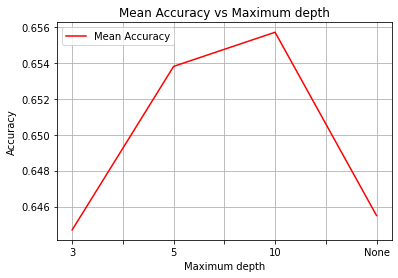

In [15]:
def dt_classifier(depth=None,min_leaf=1):
    DTclassifier = DecisionTreeClassifier(random_state = 0,max_depth=depth,min_samples_leaf=min_leaf)
    scores = cross_val_score(DTclassifier, x_train, y_train, cv=10)
    acc=round(scores.mean(),4)
    return acc

depth=[]
res=[]
res.append(dt_classifier(depth=3))
depth.append(3)
res.append(dt_classifier(depth=5))
depth.append(5)
res.append(dt_classifier(depth=10))
depth.append(10)
res.append(dt_classifier())
depth.append('None')
a=list(zip(depth,res))
df_dt_acc = pd.DataFrame(a, columns = ['Max_depth', 'Mean Accuracy'])
print(df_dt_acc)

#Plot graph for different maximum depth values and corresponding accuracy scores
df_dt_acc.plot(x='Max_depth', y='Mean Accuracy', color='red');
plt.grid();
plt.title('Mean Accuracy vs Maximum depth');
plt.xlabel('Maximum depth');
plt.ylabel('Accuracy');

Mean accuracies of Decision Tree for differnt values of max_depth has been plotted and it is observed that mean accuracy increased with increase in max_depth, reached maximum and then started decreasing.

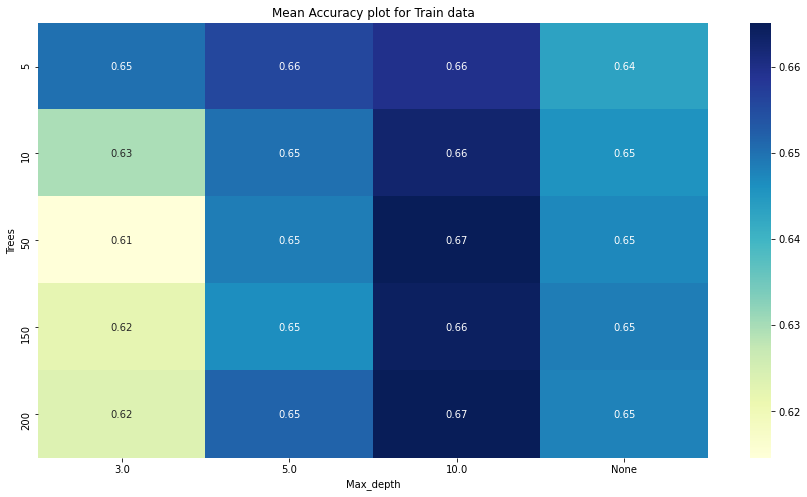

In [16]:
def rf_classifier(estimators,max_depth=None):
    RFclassifier = RandomForestClassifier(n_estimators=estimators,random_state = 0,max_depth=max_depth)
    scores = cross_val_score(RFclassifier, x_train, y_train.values.ravel(), cv=10)
    acc=round(scores.mean(),4)
    return acc

trees = [5, 10, 50, 150, 200]
depth = [3, 5, 10, None]
tree_depth_acc=[]
for i in trees:
    for j in depth:
        tree_depth_acc.append([i,j,rf_classifier(estimators=i,max_depth=j)])
df_rf_acc = pd.DataFrame(tree_depth_acc, columns = ['Trees', 'Max_depth','Mean Accuracy'])
df_rf_acc.replace(np.nan,'None',inplace=True)

df_rf_acc=df_rf_acc.pivot(index='Trees',columns='Max_depth',values='Mean Accuracy')
#Plotting the graph
plt.figure(figsize=(15,8))
sns.heatmap(data=df_rf_acc,annot=True,cmap="YlGnBu")
plt.title("Mean Accuracy plot for Train data")
plt.show()

Mean accuracies of Random Forest classifier for different values of max_depth and no of trees has been plotted as heat map and it is observed that mean accuracy increased with increase in no of trees and max_depth, reached the highest value and then decreased further.

   Estimators  Mean Accuracy
0           5         0.6551
1          10         0.6571
2          50         0.6643
3         150         0.6652
4         200         0.6650


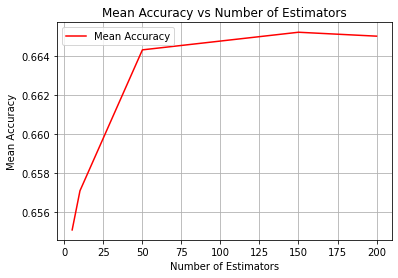

In [17]:
def gb_classifier(estimators):
    gbclassifier = GradientBoostingClassifier(n_estimators=estimators,random_state = 0)
    scores = cross_val_score(gbclassifier, x_train, y_train.values.ravel(), cv=10)
    acc=round(scores.mean(),4)
    return acc

bstages = [5, 10, 50, 150, 200]
bstages_acc=[]
for i in bstages:
    bstages_acc.append([i,gb_classifier(estimators=i)])
df_gb_acc = pd.DataFrame(bstages_acc, columns = ['Estimators','Mean Accuracy'])
print(df_gb_acc)

#Plot graph for different number of estimators and corresponding accuracy scores
df_gb_acc.plot(x='Estimators', y='Mean Accuracy', color='red');
plt.grid();
plt.title('Mean Accuracy vs Number of Estimators');
plt.xlabel('Number of Estimators');
plt.ylabel('Mean Accuracy');

Mean accuracies of GB classifier for different values of estimators has been plotted and it is observed that mean accuracy increased as estimators increased.

## 3. Analysis with all features and  scaling

In [18]:
dataset1=x_train.copy()
scale = StandardScaler()
columns_to_scale = ['Age_Group', 'Reporting_PHU_Latitude', 'Reporting_PHU_Longitude']
dataset1[columns_to_scale] = scale.fit_transform(dataset1[columns_to_scale])

  Max_depth  Mean Accuracy
0         3         0.6447
1         5         0.6538
2        10         0.6557
3      None         0.6455


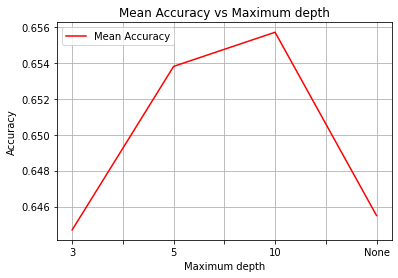

In [19]:
def dt_classifier(depth=None,min_leaf=1):
    DTclassifier = DecisionTreeClassifier(random_state = 0,max_depth=depth,min_samples_leaf=min_leaf)
    scores = cross_val_score(DTclassifier, dataset1, y_train, cv=10)
    acc=round(scores.mean(),4)
    return acc

depth=[]
res=[]
res.append(dt_classifier(depth=3))
depth.append(3)
res.append(dt_classifier(depth=5))
depth.append(5)
res.append(dt_classifier(depth=10))
depth.append(10)
res.append(dt_classifier())
depth.append('None')
a=list(zip(depth,res))
df_dt_acc = pd.DataFrame(a, columns = ['Max_depth', 'Mean Accuracy'])
print(df_dt_acc)

#Plot graph for different maximum depth values and corresponding accuracy scores
df_dt_acc.plot(x='Max_depth', y='Mean Accuracy', color='red');
plt.grid();
plt.title('Mean Accuracy vs Maximum depth');
plt.xlabel('Maximum depth');
plt.ylabel('Accuracy');

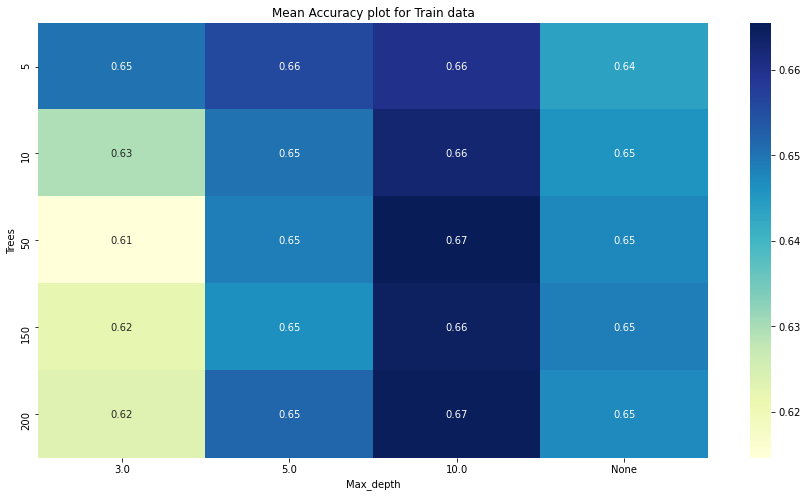

In [20]:
def rf_classifier(estimators,max_depth=None):
    RFclassifier = RandomForestClassifier(n_estimators=estimators,random_state = 0,max_depth=max_depth)
    scores = cross_val_score(RFclassifier, dataset1, y_train.values.ravel(), cv=10)
    acc=round(scores.mean(),4)
    return acc

trees = [5, 10, 50, 150, 200]
depth = [3, 5, 10, None]
tree_depth_acc=[]
for i in trees:
    for j in depth:
        tree_depth_acc.append([i,j,rf_classifier(estimators=i,max_depth=j)])
df_rf_acc = pd.DataFrame(tree_depth_acc, columns = ['Trees', 'Max_depth','Mean Accuracy'])
df_rf_acc.replace(np.nan,'None',inplace=True)

df_rf_acc=df_rf_acc.pivot(index='Trees',columns='Max_depth',values='Mean Accuracy')
#Plotting the graph
plt.figure(figsize=(15,8))
sns.heatmap(data=df_rf_acc,annot=True,cmap="YlGnBu")
plt.title("Mean Accuracy plot for Train data")
plt.show()

   Estimators  Mean Accuracy
0           5         0.6551
1          10         0.6571
2          50         0.6643
3         150         0.6652
4         200         0.6650


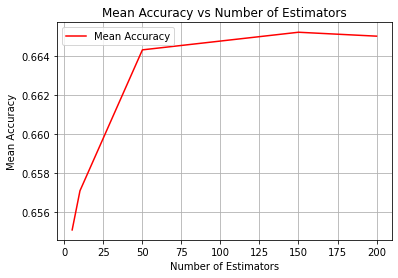

In [21]:
def gb_classifier(estimators):
    gbclassifier = GradientBoostingClassifier(n_estimators=estimators,random_state = 0)
    scores = cross_val_score(gbclassifier, dataset1, y_train.values.ravel(), cv=10)
    acc=round(scores.mean(),4)
    return acc

bstages = [5, 10, 50, 150, 200]
bstages_acc=[]
for i in bstages:
    bstages_acc.append([i,gb_classifier(estimators=i)])
df_gb_acc = pd.DataFrame(bstages_acc, columns = ['Estimators','Mean Accuracy'])
print(df_gb_acc)

#Plot graph for different number of estimators and corresponding accuracy scores
df_gb_acc.plot(x='Estimators', y='Mean Accuracy', color='red');
plt.grid();
plt.title('Mean Accuracy vs Number of Estimators');
plt.xlabel('Number of Estimators');
plt.ylabel('Mean Accuracy');

## Analysis and Discussion 

### Decision Tree

From the analyis above, we noticed that the Decision tree classifier gave maximum mean accuracy with all features at max_depth 10. Hence, we are considering the best value for maximum depth as 10.

We noticed that normalization of the data did not have any effect on the mean accuracy of the DT Classifier. This is because in Descision Tree, the features are selected and splits are made based on gini impurity or entropy and hence scaling does not effect DT classifier as it is an information based algorithm. Scaling is primarily used in similarity based algorithms.

### Perfomance of DT on test data

In [17]:
DTclassifier = DecisionTreeClassifier(random_state = 0,max_depth=10)
DTclassifier.fit(x_train,y_train)
y_predicted=DTclassifier.predict(x_test)
res = round(accuracy_score(y_test,y_predicted),4)
res

0.6678

### Analyzing the splitting rules the tree learnt

In [23]:
selected_input=x_test.iloc[0]
a=pd.DataFrame([selected_input], columns=cols)
decision_path = DTclassifier.decision_path(a)
level_length = len(decision_path.indices)
i = 1
print("A sample from x_test has been taken whose target is known (Fatal) and its decision path has been printed\n")
for node_id in decision_path.indices:
    if i < level_length:
        col_name = cols[DTclassifier.tree_.feature[node_id]]
        threshold_value  = DTclassifier.tree_.threshold[node_id]
        rule = "{} <= {}".format(col_name, threshold_value)
        print("node#{}:".format(node_id), rule, a[col_name].values)
    i = i + 1

A sample from x_test has been taken whose target is known (Fatal) and its decision path has been printed

node#0: Age_Group <= 65.0 [90.]
node#394: Outbreak_Related_No <= 0.5 [1.]
node#502: Case_AcquisitionInfo_MISSING INFORMATION <= 0.5 [0.]
node#503: Reporting_PHU_City_Mississauga <= 0.5 [0.]
node#504: Age_Group <= 75.0 [90.]
node#536: Reporting_PHU_City_Toronto <= 0.5 [1.]
node#564: Case_AcquisitionInfo_CC <= 0.5 [0.]
node#565: Client_Gender_MALE <= 0.5 [0.]
node#566: Age_Group <= 85.0 [90.]


In [24]:
y_train['Outcome1'].value_counts()

Fatal           3978
Not Resolved    3972
Resolved        3930
Name: Outcome1, dtype: int64

In [25]:
for x in range(0,len(x_train.columns)):
    print("{} : {}".format(x,x_train.columns[x]))    

0 : Age_Group
1 : Reporting_PHU_Latitude
2 : Reporting_PHU_Longitude
3 : Client_Gender_FEMALE
4 : Client_Gender_GENDER DIVERSE
5 : Client_Gender_MALE
6 : Client_Gender_UNSPECIFIED
7 : Case_AcquisitionInfo_CC
8 : Case_AcquisitionInfo_MISSING INFORMATION
9 : Case_AcquisitionInfo_NO KNOWN EPI LINK
10 : Case_AcquisitionInfo_OB
11 : Case_AcquisitionInfo_TRAVEL
12 : Case_AcquisitionInfo_UNSPECIFIED EPI LINK
13 : Reporting_PHU_City_Barrie
14 : Reporting_PHU_City_Belleville
15 : Reporting_PHU_City_Brantford
16 : Reporting_PHU_City_Brockville
17 : Reporting_PHU_City_Chatham
18 : Reporting_PHU_City_Cornwall
19 : Reporting_PHU_City_Guelph
20 : Reporting_PHU_City_Hamilton
21 : Reporting_PHU_City_Kenora
22 : Reporting_PHU_City_Kingston
23 : Reporting_PHU_City_London
24 : Reporting_PHU_City_Mississauga
25 : Reporting_PHU_City_New Liskeard
26 : Reporting_PHU_City_Newmarket
27 : Reporting_PHU_City_North Bay
28 : Reporting_PHU_City_Oakville
29 : Reporting_PHU_City_Ottawa
30 : Reporting_PHU_City_Owen So

### Split rules at max_depth 3

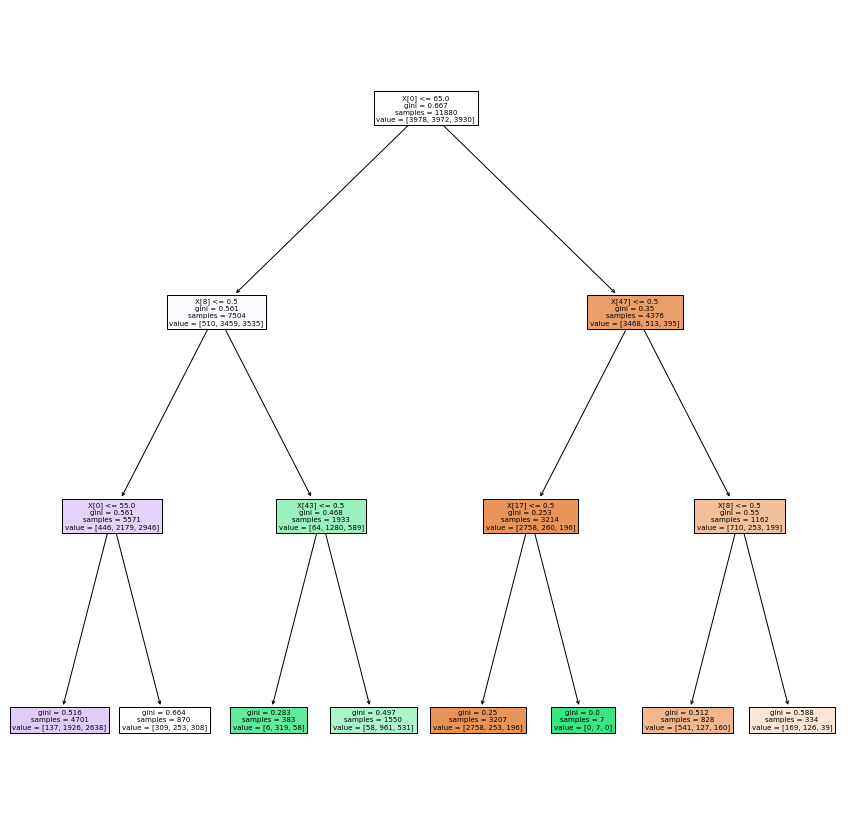

In [26]:
DTclassifier = DecisionTreeClassifier(random_state = 0,max_depth=3)
DTclassifier.fit(x_train,y_train)
plt.figure(figsize=(15,15))
tree.plot_tree(DTclassifier,filled=True);

From the above decision tree, examining the final resulting splitting rules used for the trees, below are the patterns observed:
1. Column "Age Group" has been choosen as the root node and the split has been made at "65" based on gini impurity.
2. if "Age Group" > 65, "Outbreak_Related" is Yes and if the person belongs to Reporting_PHU_City "Chatham" then the outcome is "Not Resolved"
3.  if "Age Group" <= 65, "Case_AcquisitionInfo" is MISSING INFORMATION and if the person does not belongs to Reporting_PHU_City "Toronto" then there is less probability of the outcome to be "Fatal"


### Random Forest

From the analyis above, we noticed that the Random Forest classifier gives maximum mean accuracy with all features at maximum depth 10 and number of trees 50. Hence, we are considering the best value for maximum depth as 10 and number of trees as 50. 

We noticed that normalization of the data did not have any effect on the mean accuracy of the RF Classifier. This is because Random Forest classifier is an information gain based algorithm and scaling is primarily used in similarity based algorithms

### Perfomance of RF on test data

In [27]:
RFclassifier = RandomForestClassifier(n_estimators=50,random_state = 0,max_depth=10)
RFclassifier.fit(x_train,y_train.values.ravel())
y_predicted=RFclassifier.predict(x_test)
res = round(accuracy_score(y_test,y_predicted),4)
res

0.6755

### Gradient Tree Boosting

From the analyis above, we noticed that the GB classifier gives maximum mean accuracy with all features at number of estimators as 150. Hence, we are considering the best value for number of estimators as 150

As GB classifer is also one of the ensemble methods, scaling the data did not have any effect on the mean accuracy.

### Perfomance of GB on test data

In [28]:
gbclassifier = GradientBoostingClassifier(n_estimators=150,random_state = 0)
gbclassifier.fit(x_train,y_train.values.ravel())
y_predicted=gbclassifier.predict(x_test)
res = round(accuracy_score(y_test,y_predicted),4)
res

0.6688

## Part 2 CM3 Analysis

##### For the three classifiers DT, RF and GB. Below is our analysis on train and test datasets.

1. Using cross validation - Decision Tree (DT) classifier, Random Forest (RF) classifier and Gradient Boosting (GB) classifier gave maximum mean accuracies of 65.57, 67.23 and 66.52 respectively. 
2. As expected, RF and GB classifier outperformed DT. However, GB did not perform well when compared to RF.

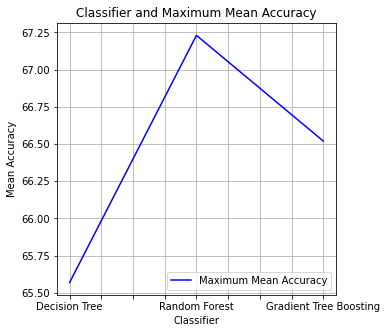

In [29]:
all_fea_meanacc = [["Decision Tree",65.57],["Random Forest",67.23],["Gradient Tree Boosting",66.52]]
all_fea_meanacc1 = pd.DataFrame(all_fea_meanacc, columns = ['Classifier','Maximum Mean Accuracy'])
all_fea_meanacc1.plot(x='Classifier', y='Maximum Mean Accuracy', color='blue',figsize=(5,5));
plt.grid();
plt.title('Classifier and Maximum Mean Accuracy');
plt.ylabel('Mean Accuracy');

### Performance of classifiers on Test data

1. On test data DT Classifier, RF Classifier and GB Classifier gave accuracies of 66.78, 67.55 and 66.88 on the test data.
2. The mean accuracies of the classifiers using CV on the train data was not as per our expectations. Same is the case with the perfomance on test data. RF outperformed DT and GB classifiers.
3. RF performed well when compared to DT as RF is a collection of many DTs reducing variance and increasing accuracy.
4. When compared to RF, GB has many more parameters to be tuned like learning rate, subsample, max depth etc to get better perfomance. Since, we are tuning only one of the parameters (n_estimators) that could be a reason why GB has a little less accuracy when compared to RF.

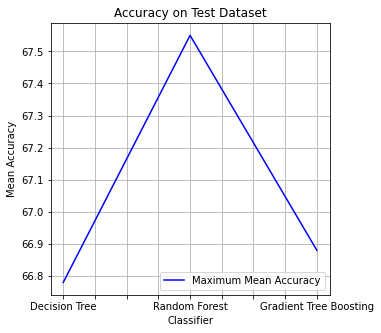

In [30]:
all_fea_meanacc = [["Decision Tree",66.78],["Random Forest",67.55],["Gradient Tree Boosting",66.88]]
all_fea_meanacc1 = pd.DataFrame(all_fea_meanacc, columns = ['Classifier','Maximum Mean Accuracy'])
all_fea_meanacc1.plot(x='Classifier', y='Maximum Mean Accuracy', color='blue',figsize=(5,5));
plt.grid();
plt.title('Accuracy on Test Dataset');
plt.ylabel('Mean Accuracy');

## Question 2: Naive Bayes Classifier 

## Part 1 CM5

## 1. Analysis without scaling - Naive Bayes

In [31]:
def nb_classifier(var_smooth):
    nbclassifier = GaussianNB(var_smoothing=var_smooth)
    nbclassifier.fit(x_train,y_train.values.ravel())
    scores = cross_val_score(nbclassifier, x_train, y_train.values.ravel(), cv=10)
    acc_mean=scores.mean()
    n=nbclassifier.predict(x_test)
    acc = round(accuracy_score(y_test,n),2)
    fscore=round(f1_score(y_test, n, average='macro'),2)
    return acc_mean,fscore,acc

smooth = [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]
smooth_acc=[]
for i in smooth:
    x,y,z=nb_classifier(var_smooth=i)
    smooth_acc.append([i,x])
df_nb_acc = pd.DataFrame(smooth_acc, columns = ['Smoothing_Value','Mean Accuracy'])
df_nb_acc

,Smoothing_Value,Mean Accuracy
0,1.000000e-10,0.384596
1,1.000000e-09,0.439226
2,1.000000e-05,0.607071
3,1.000000e-03,0.652357
4,1.000000e-01,0.600168


## 2. Analysis with Standardization - Naive Bayes

In [32]:
dataset1=x_train.copy()
scale = StandardScaler()
columns_to_scale = ['Age_Group', 'Reporting_PHU_Latitude', 'Reporting_PHU_Longitude']
dataset1[columns_to_scale] = scale.fit_transform(dataset1[columns_to_scale])
def nb_classifier(var_smooth):
    nbclassifier = GaussianNB(var_smoothing=var_smooth)
    nbclassifier.fit(x_train,y_train.values.ravel())
    scores = cross_val_score(nbclassifier, dataset1, y_train.values.ravel(), cv=10)
    acc_mean=scores.mean()
    n=nbclassifier.predict(x_test)
    acc = round(accuracy_score(y_test,n),2)
    fscore=round(f1_score(y_test, n, average='macro'),2)
    return acc_mean,fscore,acc

smooth = [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]
smooth_acc=[]
for i in smooth:
    x,y,z=nb_classifier(var_smooth=i)
    smooth_acc.append([i,x])
df_nb_acc = pd.DataFrame(smooth_acc, columns = ['Smoothing_Value','Mean Accuracy'])
df_nb_acc

,Smoothing_Value,Mean Accuracy
0,1.000000e-10,0.349411
1,1.000000e-09,0.353283
2,1.000000e-05,0.520791
3,1.000000e-03,0.598485
4,1.000000e-01,0.613384


## 3. Analysis with Normalization - Naive Bayes

In [33]:
dataset1=x_train.copy()
scale = MinMaxScaler()
columns_to_scale = ['Age_Group', 'Reporting_PHU_Latitude', 'Reporting_PHU_Longitude']
dataset1[columns_to_scale] = scale.fit_transform(dataset1[columns_to_scale])
def nb_classifier(var_smooth):
    nbclassifier = GaussianNB(var_smoothing=var_smooth)
    nbclassifier.fit(x_train,y_train.values.ravel())
    scores = cross_val_score(nbclassifier, dataset1, y_train.values.ravel(), cv=10)
    acc_mean=scores.mean()
    n=nbclassifier.predict(x_test)
    acc = round(accuracy_score(y_test,n),2)
    fscore=round(f1_score(y_test, n, average='macro'),2)
    return acc_mean,fscore,acc

smooth = [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]
smooth_acc=[]
for i in smooth:
    x,y,z=nb_classifier(var_smooth=i)
    smooth_acc.append([i,x])
df_nb_acc = pd.DataFrame(smooth_acc, columns = ['Smoothing_Value','Mean Accuracy'])
df_nb_acc

,Smoothing_Value,Mean Accuracy
0,1.000000e-10,0.348906
1,1.000000e-09,0.350337
2,1.000000e-05,0.482071
3,1.000000e-03,0.581229
4,1.000000e-01,0.596633


From the above analysis, we notice that Naive Bayes classifier gave better mean accuracy score without scaling at smoothing value as 1.000000e-03. Considering the same value for test dataset below.

### Performance of GNB on test data

In [34]:
nbclassifier = GaussianNB(var_smoothing=1.000000e-03)
nbclassifier.fit(x_train,y_train.values.ravel())
n=nbclassifier.predict(x_test)
acc = round(accuracy_score(y_test,n),4)
fscore=round(f1_score(y_test, n, average='macro'),4)
print("The Accuracy and F1 score of the classifier are {} and {} respectively".format(acc,fscore))

The Accuracy and F1 score of the classifier are 0.6708 and 0.6536 respectively


## Impact of smoothing parameter

From the analysis, Gaussian NB classifier gave maximum mean accuracy with reduced features at smoothing value "1e-3".

With the increase in the smoothing value, the mean accuracy of the classifier increased, reached the maximum at smoothing value "1e-3" and then decreased.
 
In the wheat seed data which had continuous features, the smoothing parameter did not have much impact on the mean accuracy. Whereas the COVID data having categorical features, we do see the impact of smoothing parameter on mean accuracy.

## Part 2 CM6

Since we used a Gaussin Naive Bayes here, the learning parameters of it are mean and variance. Finding these values for the best smoothing value

In [13]:
nbclassifier = GaussianNB(var_smoothing=1.000000e-03)
nbclassifier.fit(x_train,y_train.values.ravel())
n=nbclassifier.predict(x_test)
print(nbclassifier.theta_)

[[ 7.81518351e+01  4.37296593e+01 -7.94837191e+01  5.14077426e-01
   0.00000000e+00  4.78381096e-01  7.54147813e-03  7.69230769e-02
   8.01910508e-02  1.06083459e-01  7.23730518e-01  1.30718954e-02
   0.00000000e+00  2.16189040e-02  7.54147813e-04  1.25691302e-03
   7.54147813e-03  5.02765209e-04  1.03066868e-02  1.20663650e-02
   3.67018602e-02  0.00000000e+00  0.00000000e+00  2.91603821e-02
   8.99949723e-02  2.51382604e-04  7.99396682e-02  2.51382604e-04
   2.53896430e-02  6.68677728e-02  0.00000000e+00  5.02765209e-04
   1.25691302e-03  5.02765209e-03  7.29009553e-03  2.51382604e-04
   6.53594771e-03  1.00553042e-02  6.28456511e-03  1.25691302e-03
   5.15334339e-02  4.77626948e-03  2.26244344e-03  3.87883358e-01
   3.14228255e-02  5.07792861e-02  5.02765209e-02  2.48617396e-01
   7.51382604e-01]
 [ 4.03451662e+01  4.37730017e+01 -7.96273957e+01  4.96223565e-01
   2.51762336e-04  4.94964753e-01  8.55991944e-03  3.12940584e-01
   3.55488419e-01  1.34944612e-01  1.86052367e-01  1.0574

In [14]:
nbclassifier = GaussianNB(var_smoothing=1.000000e-03)
nbclassifier.fit(x_train,y_train.values.ravel())
n=nbclassifier.predict(x_test)
print(nbclassifier.sigma_)

[[132.13989168   1.19284317   3.27924332   0.87780522   0.62800339
    0.87753601   0.63548799   0.69900931   0.70176384   0.72283315
    0.82794804   0.64090441   0.62800339   0.64915492   0.62875697
    0.62925872   0.63548799   0.6285059    0.63820385   0.63992416
    0.66335822   0.62800339   0.62800339   0.65631344   0.70989927
    0.62825471   0.70155271   0.62825471   0.6527484    0.69039986
    0.62800339   0.6285059    0.62925872   0.63300576   0.63524034
    0.62825471   0.63449662   0.63795758   0.63424846   0.62925872
    0.67688113   0.63275685   0.63026071   0.86543325   0.65843882
    0.67620414   0.67575218   0.81481018   0.81481018]
 [392.67880329   1.28213727   3.22054571   0.87798913   0.62825509
    0.87797804   0.63649004   0.84301216   0.85711979   0.74473795
    0.77944027   0.6384656    0.62800339   0.65254578   0.62825509
    0.63351148   0.62951168   0.63574711   0.6382191    0.65158842
    0.66294283   0.62926062   0.62850666   0.65110899   0.78959748
    0.6

Each row in the above arrays corresponds to each target and each value in a particular row corresponds to a column. The features are one hot encoded and hence there are multiple columns.

Single Decision Tree model gave accuracy of 65.57% on test data whereas Gaussian NB gave an accuracy of 67.22%

Analyzing the results with confusioin matrix

In [15]:
print("Confusion matrix - Gaussian Naive Bayes\n")
print(confusion_matrix(y_test,n))

Confusion matrix - Gaussian Naive Bayes

[[902  25  46]
 [147 371 460]
 [121 179 720]]


In [19]:
print("Confusion matrix - Decision tree\n")
print(confusion_matrix(y_test,y_predicted))

Confusion matrix - Decision tree

[[895  37  41]
 [133 447 398]
 [129 249 642]]


The accuracies of both the classifiers slightly differ and the same can be seen with the confusion matrices.
Fatalities are identified almost equally by both the classifiers(902 by GNB and 895 by DT). But yet they were not able to completely identify all the fatalities.
Decision tree was able to classify Not Resolved targets better than Naive Bayes whereas Naive Bayes was able to classify Resolved targets better than DT.